In [131]:
from standardInclude import *
from py_th2 import *

In [132]:
filename = "./data/results_simuTreeMaker_collimator8_inner_bottom.root"
#filename = "./data/results_simuTreeMaker_collimator8_inner_top.root"
#filename = "./data/results_simuTreeMaker_collimator8_outer_bottom.root"
#filename = "./data/results_simuTreeMaker_collimator8_outer_top.root"

outfile = filename.split(".root")[0]+"_processed.root"
print(filename, outfile)
f = r.TFile(filename)
f.ls()
t = f.Get("simuTreeMaker/gm2ringsimTree")

t.Print()

./data/results_simuTreeMaker_collimator8_inner_bottom.root ./data/results_simuTreeMaker_collimator8_inner_bottom_processed.root
TFile**		./data/results_simuTreeMaker_collimator8_inner_bottom.root	
 TFile*		./data/results_simuTreeMaker_collimator8_inner_bottom.root	
  KEY: TDirectoryFile	simuTreeMaker;1	simuTreeMaker (SimuTreeMaker) folder
  KEY: TDirectoryFile	trajectoryAnalyzer;1	trajectoryAnalyzer (TrajectoryAnalyzer) folder
******************************************************************************
*Tree    :gm2ringsimTree: gm2ringsimTree                                         *
*Entries :    86000 : Total =        24897297 bytes  File  Size =   13222266 *
*        :          : Tree compression factor =   1.88                       *
******************************************************************************
*Br    0 :muDecay   : muDecayPx/F:muDecayPy:muDecayPz:muDecayX:muDecayY:     *
*         | muDecayZ:muDecayPolx:muDecayPoly:muDecayPolz:muDecayT            *
*Entries :  

Number of muons: 86000


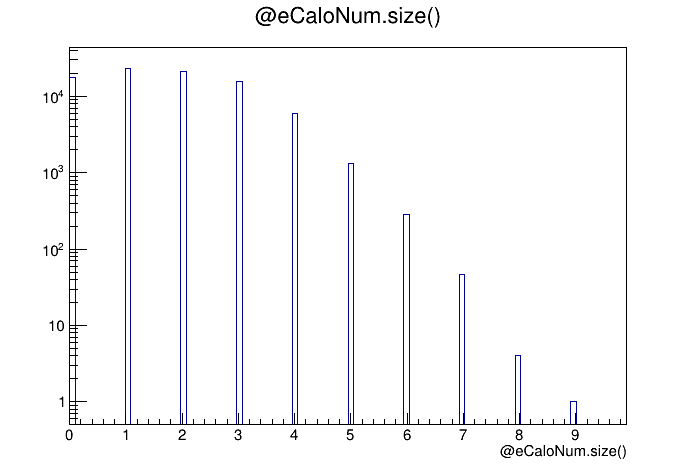

In [133]:
c = r.TCanvas()
numberOfMuons = t.Draw("@eCaloNum.size()","","")
print("Number of muons:", numberOfMuons)
c.SetLogy()
c.Draw()

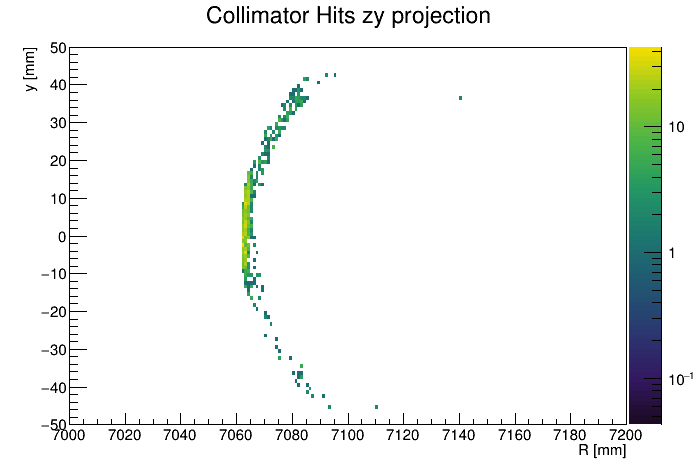

In [134]:
c = r.TCanvas()
h_col = f.Get("trajectoryAnalyzer/collimatorHits").Clone()
h_col.SetDirectory(0)
h_col.Project3D("zy").Draw("colz")
c.SetLogz()
c.Draw()

In [135]:
alltriples = []
for triple in range(3):
    calos = []
    for i in range(24):
        #calos.append( pyTH2(None, 60, [6500,7500], 60, [-200,200]) )
        calos.append( r.TH2D("calo_"+str(i+1)+"_tripleHit_"+str(triple+1), 
                             "Calo "+str(i+1)+" Triple Hit "+str(triple+1)+" ; R [mm]; y [mm]", 
                             60, 6500, 7500,
                             60, -200,200) )
    alltriples.append(calos)

In [136]:
print(alltriples)

[[<ROOT.TH2D object ("calo_1_tripleHit_1") at 0x7ff37af625c0>, <ROOT.TH2D object ("calo_2_tripleHit_1") at 0x7fffd21bf180>, <ROOT.TH2D object ("calo_3_tripleHit_1") at 0x7ff37d3ef5e0>, <ROOT.TH2D object ("calo_4_tripleHit_1") at 0x7fffd18f12e0>, <ROOT.TH2D object ("calo_5_tripleHit_1") at 0x7fffd2baff90>, <ROOT.TH2D object ("calo_6_tripleHit_1") at 0x7fffd18ee780>, <ROOT.TH2D object ("calo_7_tripleHit_1") at 0x7fffd2661350>, <ROOT.TH2D object ("calo_8_tripleHit_1") at 0x7fffd2bf2310>, <ROOT.TH2D object ("calo_9_tripleHit_1") at 0x7fffd269c130>, <ROOT.TH2D object ("calo_10_tripleHit_1") at 0x7fffd268f430>, <ROOT.TH2D object ("calo_11_tripleHit_1") at 0x7fffd2678cb0>, <ROOT.TH2D object ("calo_12_tripleHit_1") at 0x7fffd26a1aa0>, <ROOT.TH2D object ("calo_13_tripleHit_1") at 0x7fffd223a020>, <ROOT.TH2D object ("calo_14_tripleHit_1") at 0x7fffd2bf1dd0>, <ROOT.TH2D object ("calo_15_tripleHit_1") at 0x7fffd2bea280>, <ROOT.TH2D object ("calo_16_tripleHit_1") at 0x7fffd12418f0>, <ROOT.TH2D obje

In [137]:
%%time

for i, e in enumerate(t):
    #if((e.eCaloNum.size() < 3) or (e.eCaloNum.size() > 10)):
    if((e.eCaloNum.size() < 3)):
        continue
    if(False):
        print([x for x in e.eCaloNum])
        print([x for x in e.eCaloY])
        print([math.sqrt(x**2 + y**2) for (x,y) in zip(e.eCaloZ, e.eCaloX)])
        print([x for x in e.eCaloE])
    #firstcalo = e.eCaloNum[0]
    #ri = np.sqrt(e.eCaloX[0]**2 + e.eCaloZ[0]**2)
    #yi = e.eCaloY[0]
    calos = [x for x in e.eCaloNum]
    rs = [math.sqrt(x**2 + y**2) for (x,y) in zip(e.eCaloZ, e.eCaloX)]
    ys = [x for x in e.eCaloY]
    
    for triple in range(3):
        alltriples[triple][calos[triple] - 1].Fill( rs[triple], ys[triple] )
    
    #calos[firstcalo-1].fill( ri, yi  )
    #calos[firstcalo-1].Fill( ri, yi  )
    #if(i > 10):
    #    break

CPU times: user 3.22 s, sys: 1.97 s, total: 5.19 s
Wall time: 5.79 s


In [138]:
for x in alltriples:
    for y in x:
        y.Scale(1./numberOfMuons)

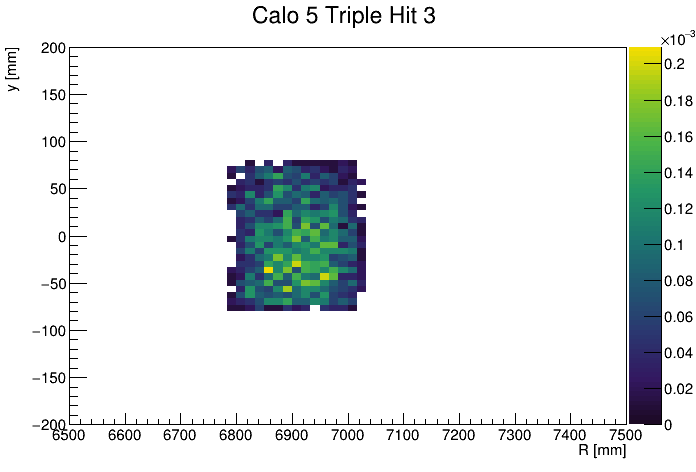

In [139]:
c = r.TCanvas()
alltriples[2][4].Draw("colz")
c.Draw()

In [140]:
fout = r.TFile(outfile,"RECREATE")
fout.cd()
h_col.Write()
for calos in alltriples:
    for h in calos:
        h.Write()
fout.Write()
fout.Close()